<a href="https://colab.research.google.com/github/agrat-20/ICG-Summer-Program-2021-DS/blob/main/ICG_Assignment(1)_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [ ]:
#Uploading the training dataset
uploaded1 = files.upload()

Saving train.csv to train.csv


In [ ]:
uploaded1

{'train.csv': b'PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare\r\n1,0,3,male,22,1,0,7.25\r\n2,1,1,female,38,1,0,71.2833\r\n3,1,3,female,26,0,0,7.925\r\n4,1,1,female,35,1,0,53.1\r\n5,0,3,male,35,0,0,8.05\r\n6,0,3,male,,0,0,8.4583\r\n7,0,1,male,54,0,0,51.8625\r\n8,0,3,male,2,3,1,21.075\r\n9,1,3,female,27,0,2,11.1333\r\n10,1,2,female,14,1,0,30.0708\r\n11,1,3,female,4,1,1,16.7\r\n12,1,1,female,58,0,0,26.55\r\n13,0,3,male,20,0,0,8.05\r\n14,0,3,male,39,1,5,31.275\r\n15,0,3,female,14,0,0,7.8542\r\n16,1,2,female,55,0,0,16\r\n17,0,3,male,2,4,1,29.125\r\n18,1,2,male,,0,0,13\r\n19,0,3,female,31,1,0,18\r\n20,1,3,female,,0,0,7.225\r\n21,0,2,male,35,0,0,26\r\n22,1,2,male,34,0,0,13\r\n23,1,3,female,15,0,0,8.0292\r\n24,1,1,male,28,0,0,35.5\r\n25,0,3,female,8,3,1,21.075\r\n26,1,3,female,38,1,5,31.3875\r\n27,0,3,male,,0,0,7.225\r\n28,0,1,male,19,3,2,263\r\n29,1,3,female,,0,0,7.8792\r\n30,0,3,male,,0,0,7.8958\r\n31,0,1,male,40,0,0,27.7208\r\n32,1,1,female,,1,0,146.5208\r\n33,1,3,female,,0,0,7.75\r\

In [ ]:
#Defining training set in the dataframe named as df1
col_names = ['PassengerId', 'Survived', 'Pclass', 'Sex', ' Age', ' SibSp', 'Parch', 'Fare']
df1 = pd.read_csv('/content/train.csv')
df1.columns = col_names
print(df1.head())

   PassengerId  Survived  Pclass     Sex   Age   SibSp  Parch     Fare
0            1         0       3    male  22.0       1      0   7.2500
1            2         1       1  female  38.0       1      0  71.2833
2            3         1       3  female  26.0       0      0   7.9250
3            4         1       1  female  35.0       1      0  53.1000
4            5         0       3    male  35.0       0      0   8.0500


In [ ]:
#Removing the PassengerId column because I think it is of no use in prediciting the survived cases
df1.pop("PassengerId")

0        1
1        2
2        3
3        4
4        5
      ... 
615    616
616    617
617    618
618    619
619    620
Name: PassengerId, Length: 620, dtype: int64

In [ ]:
#Dataframe of training test after removing PassengerId column
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
615,1,2,female,24.0,1,2,65.0000
616,0,3,male,34.0,1,1,14.4000
617,0,3,female,26.0,1,0,16.1000
618,1,2,female,4.0,2,1,39.0000


In [ ]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', ' Age', ' SibSp', 'Parch', 'Fare'], dtype='object')

Since, Sex is categorical variable hence we have to convert it into some numerical value for which I used the get_dummies function of Pandas library. So, this will assign the 0 value to females and 1 to male. And using the arguement drop_first = True, it has been ensured that first column of female values has been dropped, hence we left only with male values. Below, I wrote the code for the same.

In [ ]:
sex_train = pd.get_dummies(df1['Sex'], drop_first = True)

In [ ]:
sex_train

,male
0,1
1,0
2,0
3,0
4,1
...,...
615,0
616,1
617,0
618,0


In [ ]:
# Here, I added the column of male in the dataframe obtained by removing the PassengerId
df1 = pd.concat([df1, sex_train], axis = 1)

In [ ]:
df1.columns     # To check whether that column of male has been added or not.

Index(['Survived', 'Pclass', 'Sex', ' Age', ' SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
#Since, until now we have already added the male column which has numerical value. So, we could remove the Sex column.
df1.pop("Sex")

0        male
1      female
2      female
3      female
4        male
        ...  
615    female
616      male
617    female
618    female
619      male
Name: Sex, Length: 620, dtype: object

In [ ]:
#Dataframe df1 after removing the Sex column
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
615,1,2,24.0,1,2,65.0000,0
616,0,3,34.0,1,1,14.4000,1
617,0,3,26.0,1,0,16.1000,0
618,1,2,4.0,2,1,39.0000,0


In [ ]:
#Shape of the final dataframe of training set
df1.shape

(620, 7)

In [ ]:
df1.columns          # To check the actual saved name of the columns.

Index(['Survived', 'Pclass', ' Age', ' SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
#Renaming of the column
df1 = df1.rename(columns={' Age': 'Age'})
df1 = df1.rename(columns={' SibSp': 'SibSp'})

In [ ]:
df1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

Using seaborn library to get a boxplot of values of Age variable so, that I could find out which parameter(i.e mean, mode, median, constant value). I have to use to fill the empty spaces of the Age column. Here, I found out that this variable is right-skewed so, according to some texts we should use median value to fill the empty spaces. So, below in some cells I used the code for the same.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


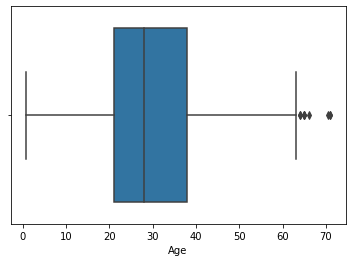

In [ ]:
 sns.boxplot(df1.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


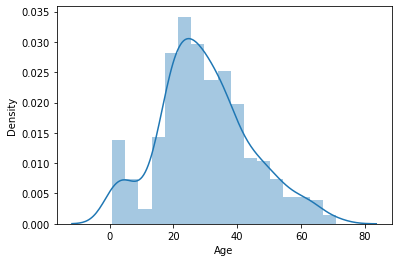

In [ ]:
sns.distplot(df1.Age)      # Gives the curve of right-skewed data

In [ ]:
# Using median to fill the empty spaces in the Age column
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [ ]:
#Final dataframe of training set
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
615,1,2,24.0,1,2,65.0000,0
616,0,3,34.0,1,1,14.4000,1
617,0,3,26.0,1,0,16.1000,0
618,1,2,4.0,2,1,39.0000,0


In [ ]:
df1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
df1.shape

(620, 7)

In [ ]:
# Converting the dataframe of training set into numpy arrays. Also, finding their shape and length.
X_train = df1[['Pclass','Age','SibSp','Parch','Fare','male']]
X_train = X_train.to_numpy()
Y_train = df1['Survived'].to_numpy()
X_train.shape,len(Y_train)

((620, 6), 620)

In [ ]:
#Uploading the file of test set
uploaded2 = files.upload()
uploaded2

Saving test.csv to test.csv


{'test.csv': b'PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare\r\n621,0,3,male,27,1,0,14.4542\r\n622,1,1,male,42,1,0,52.5542\r\n623,1,3,male,20,1,1,15.7417\r\n624,0,3,male,21,0,0,7.8542\r\n625,0,3,male,21,0,0,16.1\r\n626,0,1,male,61,0,0,32.3208\r\n627,0,2,male,57,0,0,12.35\r\n628,1,1,female,21,0,0,77.9583\r\n629,0,3,male,26,0,0,7.8958\r\n630,0,3,male,,0,0,7.7333\r\n631,1,1,male,80,0,0,30\r\n632,0,3,male,51,0,0,7.0542\r\n633,1,1,male,32,0,0,30.5\r\n634,0,1,male,,0,0,0\r\n635,0,3,female,9,3,2,27.9\r\n636,1,2,female,28,0,0,13\r\n637,0,3,male,32,0,0,7.925\r\n638,0,2,male,31,1,1,26.25\r\n639,0,3,female,41,0,5,39.6875\r\n640,0,3,male,,1,0,16.1\r\n641,0,3,male,20,0,0,7.8542\r\n642,1,1,female,24,0,0,69.3\r\n643,0,3,female,2,3,2,27.9\r\n644,1,3,male,,0,0,56.4958\r\n645,1,3,female,0.75,2,1,19.2583\r\n646,1,1,male,48,1,0,76.7292\r\n647,0,3,male,19,0,0,7.8958\r\n648,1,1,male,56,0,0,35.5\r\n649,0,3,male,,0,0,7.55\r\n650,1,3,female,23,0,0,7.55\r\n651,0,3,male,,0,0,7.8958\r\n652,1,2,female,18,0,

In [ ]:
# Converting the file of test set into the dataframe named as df2
col_names = ['PassengerId', 'Survived', 'Pclass', 'Sex', ' Age', ' SibSp', 'Parch', 'Fare']
df2 = pd.read_csv('/content/test.csv')
df2.columns = col_names
print(df2.head())

   PassengerId  Survived  Pclass   Sex   Age   SibSp  Parch     Fare
0          621         0       3  male  27.0       1      0  14.4542
1          622         1       1  male  42.0       1      0  52.5542
2          623         1       3  male  20.0       1      1  15.7417
3          624         0       3  male  21.0       0      0   7.8542
4          625         0       3  male  21.0       0      0  16.1000


In [ ]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000
...,...,...,...,...,...,...,...,...
266,887,0,2,male,27.0,0,0,13.0000
267,888,1,1,female,19.0,0,0,30.0000
268,889,0,3,female,NaN,1,2,23.4500
269,890,1,1,male,26.0,0,0,30.0000


In [ ]:
# Removing the column of PassengerId for the same reasons as in the training set
df2.pop("PassengerId")

0      621
1      622
2      623
3      624
4      625
      ... 
266    887
267    888
268    889
269    890
270    891
Name: PassengerId, Length: 271, dtype: int64

In [ ]:
# Converting the categorical value of Sex value into the numerical ones.
pd.get_dummies(df2['Sex'])

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
266,0,1
267,1,0
268,1,0
269,0,1


In [ ]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', ' Age', ' SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
df2 = df2.rename(columns={' Age': 'Age'})
df2 = df2.rename(columns={' SibSp': 'SibSp'})

In [ ]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,27.0,1,0,14.4542
1,1,1,male,42.0,1,0,52.5542
2,1,3,male,20.0,1,1,15.7417
3,0,3,male,21.0,0,0,7.8542
4,0,3,male,21.0,0,0,16.1000
...,...,...,...,...,...,...,...
266,0,2,male,27.0,0,0,13.0000
267,1,1,female,19.0,0,0,30.0000
268,0,3,female,NaN,1,2,23.4500
269,1,1,male,26.0,0,0,30.0000


In [ ]:
# Including only the value of Male column same as done in the training set.
sex_test = pd.get_dummies(df2['Sex'], drop_first = True)

In [ ]:
df2 = pd.concat([df2, sex_test], axis = 1)

In [ ]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,27.0,1,0,14.4542,1
1,1,1,male,42.0,1,0,52.5542,1
2,1,3,male,20.0,1,1,15.7417,1
3,0,3,male,21.0,0,0,7.8542,1
4,0,3,male,21.0,0,0,16.1000,1
...,...,...,...,...,...,...,...,...
266,0,2,male,27.0,0,0,13.0000,1
267,1,1,female,19.0,0,0,30.0000,0
268,0,3,female,NaN,1,2,23.4500,0
269,1,1,male,26.0,0,0,30.0000,1


In [ ]:
# Removing the column of Sex
df2.pop('Sex')

0        male
1        male
2        male
3        male
4        male
        ...  
266      male
267    female
268    female
269      male
270      male
Name: Sex, Length: 271, dtype: object

In [ ]:
df2.isnull().sum()

Survived     0
Pclass       0
Age         46
SibSp        0
Parch        0
Fare         0
male         0
dtype: int64

In [ ]:
df2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
df2 = df2.rename(columns={' Age': 'Age'})

In [ ]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [ ]:
# Final dataframe of the testing set
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,27.0,1,0,14.4542,1
1,1,1,42.0,1,0,52.5542,1
2,1,3,20.0,1,1,15.7417,1
3,0,3,21.0,0,0,7.8542,1
4,0,3,21.0,0,0,16.1000,1
...,...,...,...,...,...,...,...
266,0,2,27.0,0,0,13.0000,1
267,1,1,19.0,0,0,30.0000,0
268,0,3,28.0,1,2,23.4500,0
269,1,1,26.0,0,0,30.0000,1


In [ ]:
df2['Age'].isnull().sum()

0

In [ ]:
df2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [ ]:
# Converting the variables of test set into the numpy arrays and seperate arrays for dependent and independent variables. Also, calculated the
# shape and length of them.
X_test = df2[['Pclass','Age','SibSp','Parch','Fare','male']]
X_test = X_test.to_numpy()
Y_test = df2['Survived'].to_numpy()
X_test.shape,len(Y_test)

((271, 6), 271)

In [ ]:
# Defining the sigmoid sunction to start with the logistic regression using numpy library.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))         # Returns a numpy array

Defined a function to calculate the sigmoid value and loss. Also, calculated the derivatives of weights and biases to estimate the difference between the minimum value and present value of loss function. This function returns the value of parameters ie. weights and biases which suits best.
Reference: https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e

In [ ]:
def optimize(x, y,learning_rate,iterations,parameters): 
    size = x.shape[0]
    w = parameters["w"]                   # Here, parameters is a dictionary with a key w which has a numpy array as value and name of that array is w.
    b = parameters["b"]                   # Here, parameters is a dictionary with a key b which has a numpy array as value and name of that array is b.
    for i in range(iterations): 
        s = sigmoid(np.dot(x, w) + b)     # s is a numpy array returned by the sigmoid function and hence becomes the hypothesis function.
        loss = -1/size * np.sum(y * np.log(s)) + (1 - y) * np.log(1-s)       
        dw = 1/size * np.dot(x.T, (s - y))
        db = 1/size * np.sum(s - y)
        w = w - learning_rate * dw
        b = b - learning_rate * db 
    
    parameters["w"] = w
    parameters["b"] = b
    return parameters

In [ ]:
# Here, the values of parameters set which has weight as w and bias as b and has been initialized with value=0
initial_parameters = {} 
initial_parameters["w"] = np.zeros(X_train.shape[1])
initial_parameters["b"] = 0

In [ ]:
# Training the model
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,initial_parameters)
    return parameters_out

In [ ]:
# Calculated the value of parameters using the model. Parameters_out is also a dictionary having key as b and w and both have numpy array as their respective value.
parameters_out = train(X_train, Y_train, learning_rate = 0.005, iterations = 5000)
parameters_out

{'b': 0.354378640639931,
 'w': array([-0.06204788,  0.00468488, -0.31236042,  0.06896576,  0.03489376,
        -1.67715314])}

In [78]:
# Make predictions dor the X_test values and saving them into list 
output_values = np.dot(X_test, parameters_out['w']) + parameters_out['b']
#output_values
Y_pred = sigmoid(output_values)
print(Y_pred)
Y_pred = [1 if p >= 0.5 else 0 for p in Y_pred]
Y_pred

[0.23318287 0.58258539 0.24799618 0.24296851 0.29969596 0.50718693
 0.32106235 0.95734303 0.24757328 0.24826307 0.50919423 0.2642798
 0.45744159 0.2220697  0.59502667 0.69319064 0.2530391  0.3477209
 0.88992645 0.24447269 0.24210783 0.9439011  0.58710027 0.64419285
 0.57150349 0.76942399 0.24151504 0.52903218 0.24707131 0.63168102
 0.24932281 0.76604873 0.24670455 0.63936335 0.61965775 0.6469221
 0.24932281 0.64921943 0.29203953 0.95154367 0.9472626  0.25551428
 0.43246799 0.25375103 0.18984035 0.65543497 0.29398052 0.24853473
 0.26374897 0.87276409 0.82275713 0.56525662 0.32026725 0.29984837
 0.21153568 0.23988843 0.24726665 0.64473533 0.89164318 0.99999995
 0.64184011 0.80518779 0.25099257 0.22606187 0.48792351 0.48667251
 0.22461711 0.2563536  0.2400208  0.99959285 0.60754222 0.67350908
 0.64419285 0.24237753 0.45579073 0.32471421 0.26465971 0.63859141
 0.92204606 0.26014487 0.99966582 0.42468211 0.6954852  0.24570368
 0.19381502 0.41170484 0.71344368 0.43271375 0.99661006 0.2517778

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,


Initializing the accuracy with value equals to 0. Then comparing the value in Y_pred and Y_test, if they have same value then it adds up the accuracy. Now, Accuracy is being calculated using the accuracy/length of list of Y_pred values.

In [79]:
accuracy = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(Y_pred)}")

Accuracy = 0.7822878228782287
